
# Projet math info : équation différentielle

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg
from math import sqrt
from numpy import linalg, vstack
import time

In [18]:
"""programme de la première question"""
def solve_euler_explicit(f, X0, dt, n=1000): # on prend toujours t0 = 0, quitte à poser y(t) = x(t + t0)
    t = [0] ; T = 0
    X = np.copy(X0) ; x = [X0]       
    for i in range (n) :
        X = np.copy(X + dt * f(T, X))
        x.append(X)
        t.append(T)
        T += dt
        
    return t,x 

In [19]:
"""fonction de tracé de x(t) quel que soit l'ordre de l'équation différentielle, i.e la dimension de X0 (X0 = [x(t0), x'(t0)]))"""
def tracer_eul(f, X0, dt, n = 1000):
    y=solve_euler_explicit(f, X0, dt) 
    if type(X0) == np.ndarray :
        x = [y[1][i][0] for i in range(len(y[1]))]
        plt.plot(y[0], x)
    else :    
        plt.plot(y[0], y[1])

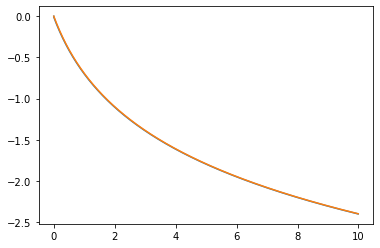

In [20]:
#Test ordre 1 : on résout x_point = -exp(x)
def h(T, x):
    return -np.exp(x)
def x_reel_1(t) : 
    return -np.log(1 + t)
tracer_eul(h, 0, 0.01)
subdiv = np.arange(0, 1000 * 0.01, 0.01)
plt.plot(subdiv, [x_reel_1(t) for t in subdiv])
#A commenter

En orange a été tracée la courbe exacte de la solution de l'équation différentielle 
$\dot x = - exp(x)$ , entre 0 et 10.
En bleu, il s'agit de notre solution approchée par Euler explicite avec un pas de temps de 0.01 sur le même intervalle \[0, 10\[ . Illustrons alors la convergence pour cet exemple d'Euler explicite. On va dans cette optique créer une fonction qui pour un schéma donné permettra d'exprimer en fonction du pas de temps le maximum des différences entre modélisation et fonction réelle, pour ainsi montrer que celui-ci tend vers 0 lorsque le pas de temps tend vers 0 ( on se place ici pour simplifier le programme dans le cadre d'un pas de temps constant).

In [35]:

def convergence(f, x_reel, X0, liste_dt):
    def aux(d) :  
        n = int(10//d)
        y = solve_euler_explicit(f, X0, d, n)[1]
        if type(X0) == np.ndarray : # si l'ordre est supérieur ou égal à 2
            diff = [abs(x_reel(k * d)-y[k][0]) for k in range(len(y))]
        else : 
            diff = [abs(x_reel(k * d)-y[k]) for k in range(len(y))]
            
        return max(diff)
    plt.plot(liste_dt, [aux(d) for d in liste_dt])


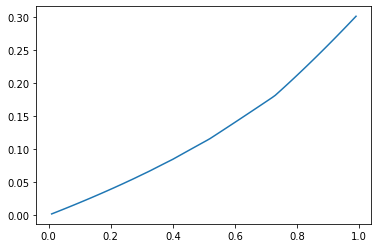

In [22]:
"""Dans le cadre d'un ordre 1 choisi : ici f(x, t) = -exp(x)"""
dt_liste = np.arange(0.01, 1, 0.01)
convergence(h, x_reel_1, 0.0, dt_liste)

La courbe vérifie bien que $\lim\limits_{dt \to 0}$ecart(dt) = 0, on a bien la convergence de la méthode d'Euler pour ce cas particulier.

On peut aussi étudier l'éventuelle stabilité des modèles d'ordre 1 et 2 donnés en exemple, qui ne découlent pas nécessairement de la convergence montrée précédemment. Dans ce but, on va créer une fonction perturb qui sort le max des écarts pour une perturbation donnée et indépendante du numéro de l'itérationet une fonction donnée. Ainsi, on pourra tracer perturb($\delta$), et voir si on peut majorer cette fonction par une fonction linéaire en $\delta$. 

In [23]:
def perturb(f, x0, delta, dt, n = 1000):
    fperturb = lambda t, x : f(t, x) + delta/dt # on créé la fonction f perturbée 
    y = solve_euler_explicit(f, x0, dt)[1]
    yperturb = solve_euler_explicit(fperturb, x0, dt)[1]
    if type(x0) == np.ndarray :
        y = [y[i][0] for i in range(len(y))]
        yperturb = [yperturb[i][0] for i in range(len(yperturb))]
 
    diff = []
    for k,l in zip(y, yperturb):
        diff.append(k-l)
    return np.max([np.linalg.norm(x) for x in diff])


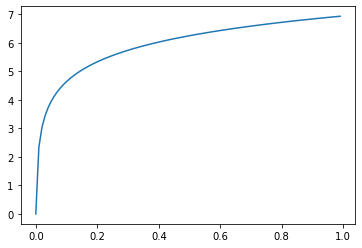

In [24]:
liste_deltas = np.arange(0, 1, 0.01)
plt.plot(liste_deltas, [perturb(h, 1, liste_deltas[i], 0.01) for i in range(len(liste_deltas))])

Par exemple, pour l'équation $\dot x = -exp(x)$ , on ne peut pas au vu de l'allure de la courbe majorer perturb($\delta$) par une fonction linéaire (et non affine car les points initiaux sont pris identiques) en $\delta$, et donc pour f(x,t) = -exp(x) la méthode d'Euler explicite n'est pas stable. 

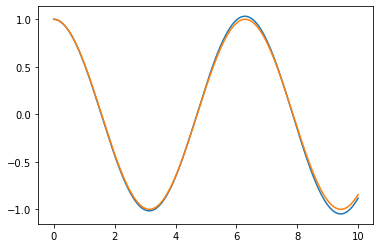

In [25]:
#Test ordre 2 : on résout x_point_point = -x
def g(T, x):
    return np.array([x[1], -x[0]])

tracer_eul(g, np.array([1, 0]), 0.01, 1000)

def x_reel_2(t) : 
    return np.cos(t)
liste = np.arange(0, 10, 0.01)
plt.plot(liste, x_reel_2(liste))

'"Ici enc'

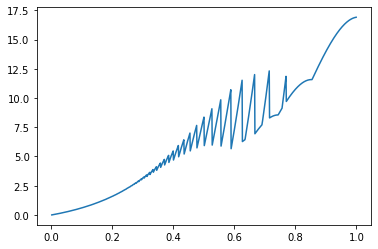

In [26]:
"""Testons l'éventuelle convergence de la méthode pour un oscillateur harmonique de pulsation 1 rad.s-1"""
liste_dt_2 = np.arange(0.001, 1, 0.001)
convergence(g, x_reel_2, np.array([1, 0]), liste_dt_2)
""""Ici enc"""

La courbe vérifie bien que $\lim\limits_{dt \to 0}$ecart(dt) = 0, on a bien la convergence de la méthode d'Euler pour ce cas particulier d'ordre 2 également.

"C'est bien stable"

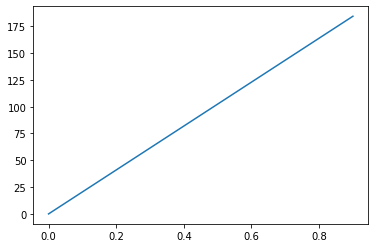

In [27]:
"Ici on teste la stabilité de x tel que x''(t) = cos(x(t))-x'(t)"
liste_deltas = [np.array([0, x]) for x in np.arange(0, 1, 0.1)]
plt.plot([x[1] for x in liste_deltas], [perturb(g, np.array([1.0, 30.0]), x, 0.01) for x in liste_deltas])
"C'est bien stable"

$\rightarrow \textbf{Nous cherchons à montrer que l'erreur locale, $e_{j+1}$, vérifie l'égalité suivante :}$ 

$$\| e_{j+1} \| = \frac{\Delta t_j}{2} \|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}) \| + O(\Delta t_j^3)$$

Pour cela, on sait que $e_{j+1} = x^j + \int_{t_j}^{t_{j+1}} f(s, x(s)) \, \mathrm{d}s - x^{j+1} = -\Delta t_j f(t_{j}, x^{j}) + x(t_{j+1}) - x(t_j)$

On effectue un développement de Taylor poussé à l'ordre 2 : (on considère f comme une fonction de $t_j$, on aurait pu poser h telle que $h(t_j) = f(t_j, x(t_j)) $

$= -\Delta t_j f(t_{j}, x^{j}) + x(t_j) +\Delta t_j f(t_{j}, x(t_j)) - x(t_j) +  \frac {\Delta t_j ^2}{2} \frac{df}{dt_j}(t_j, x(t_j)) + O(\Delta t_j^3)$ (1)


Ici, on pourra admettre un problème : un développement de Taylor à l'ordre 2 s'écrirait seulement avec un $o(\Delta t_j^2)$

Or $\frac{df}{dt_j}(t_j, x(t_j)) = \partial t f(t_j, x(t_j)) + \partial x f(t_j, x(t_j)) f(t_j, x(t_j))$


On obtient alors l'égalité suivante :    $e_{j+1} =  -\Delta t_j f(t_{j}, x^j) +\Delta t_j f(t_{j}, x(t_j)) + \frac {\Delta t_j }{2} [\Delta t_j \partial t f(t_j, x(t_j)) + \partial x f(t_j, x(t_j)) f(t_j, x(t_j))] + O(\Delta t_j ^3)$ (2)


De plus, on initialise de sorte à ce que $x(t_j) = x^j$. On a alors :

$\Delta t_j \partial t f(t_j, x(t_j)) + \partial x f(t_j, x(t_j)) f(t_j, x(t_j)) = f(t_{j+1}, x(t_j)) + \Delta t_j f(t_j, x(t_j)) - f(t_j, x(t_j)) = f(t_{j+1}, x^j + \Delta t_j f(t_j, x^j)) - f(t_j, x^j)$ \
$= f(t_{j+1}, x^{j+1}) - f(t_j, x^j)$

Ainsi, et toujours en utilisant $x(t_j) = x^j$, on peut simplifier (2) 

$e_{j+1} =  -\Delta t_j f(t_{j}, x^j) +\Delta t_j f(t_{j}, x^j) + \frac{\Delta t_j}{2} (f(t_{j+1}, x^{j+1}) - f(t_j, x^j)) + O(\Delta t_j^3) = \frac{\Delta t_j}{2} (f(t_{j+1}, x^{j+1}) - f(t_j, x^j)) + O(\Delta t_j^3)$

Finalement, on applique la norme et on obtient : 


$$\boxed{\| e_{j+1} \| = \frac{\Delta t_j}{2} \|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}) \| + O(\Delta t_j^3)}$$

$\rightarrow \textbf{Montrons que $e_{j+1} = O(\Delta t_j^2)$}$

Pour cela, nous allons utiliser l'expression (1) obtenu à la question précédente :  

$e_{j+1} = -\Delta t_j f(t_{j}, x^{j}) + x(t_j) +\Delta t_j f(t_{j}, x(t_j)) - x(t_j) +  \frac {\Delta t_j ^2}{2} \frac{df}{dt_j}(t_j, x(t_j)) + O(\Delta t_j^3)$ (1)\
$= -\Delta t_j f(t_{j}, x^{j}) + \Delta t_j f(t_{j}, x(t_j)) + \frac {\Delta t_j ^2}{2} \frac{df}{dt_j}(t_j, x(t_j)) + O(\Delta t_j^3)$

On simplifie grâce à  $x(t_j) = x^j$ : 

$e_{j+1} = \frac {\Delta t_j ^2}{2} \frac{df}{dt_j}(t_j, x(t_j)) + O(\Delta t_j^3)$

Nous pouvons dès lors conclure. En effet, $\frac {\Delta t_j ^2}{2} \frac{df}{dt_j}(t_j, x(t_j)) = O(\Delta t_j^2)$ , puisque f n'est en aucun cas fonction de tj, de même que $O(\Delta t_j^3) =  O(\Delta t_j^2)$ 

Ainsi, $$\boxed{e_{j+1} = O(\Delta t_j^2)}$$

$\rightarrow \textbf{Justifions qu'une stratégie d'adaptation du pas de temps possible est de prendre }$
$\Delta t_{new} = \Delta t \sqrt \frac{Tol_{abs}}{\| e_{j+1} \|}$

On veut améliorer la vitesse de notre algorithme. Pour cela nous cherchons à augmenter le pas de temps lorsque l'erreur n'est pas trop grande. Or, Nous savons que $ e_{j+1} \leqslant Tol_{abs}$, ce qui permet de prouver que $\Delta t_{new} = \Delta t \sqrt \frac{Tol_{abs}}{\| e_{j+1} \|} \geqslant \Delta t$ . D'autre part, $Tol_{abs}$ correspond à l'erreur maximale autorisée : quand celle-ci est obtenue, nous sommes dans le cas où $\Delta t_{new} = \Delta t$, c'est-à-dire dans le cas du $\textbf{pas fixe}$. Le reste du temps, $\| e_{j+1} \| < Tol_{abs}$ et on a bien $\Delta t_{new} > \Delta t$. 

On peut justifier la présence de la racine carrée de la manière suivante : nous avons montré plus haut que $e_{j+1} = O(\Delta t_j^2)$. Ainsi $e_{j+1} = f.\Delta t^2$ avec $f$ une fonction bornée et qui ne s'annule pas. Si on utilise cette égalité dans celle de $\Delta t_{new}$, on obtient $\Delta t_{new} = \Delta t \sqrt \frac{Tol_{abs}}{\|f\|. \Delta t^2} = \sqrt \frac{Tol_{abs}}{\|f\|}$. On est sûr que  $\Delta t_{new}$ n'est ni-nul, ni ne diverge d'après les hypothèses sur $f$ (ne s'annule pas et bornée) de sorte que $\Delta t_{new} = \left\{
    \begin{array}{ll}
        \Delta t_{new} \neq 0 \\
        \Delta t_{new} > \Delta t
    \end{array}
\right.$

$$\textbf{Finalement, cette stratégie d'adaptation du pas de temps est adéquat.}$$



In [28]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t, x)
            x_back = x_next - dt * f(t, x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:#rapidité et finitude 
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        ts = vstack([ts, t_next])
        xs = vstack([xs, x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Fort de ces constatations, analysons le programme proposé dans l'énoncé : il permet de retourner la liste des pas de temps optimaux et la modélisation correspondante de l'équation $\dot x = f(x)$ de manière à à la fois respecter les contraintes de tolérance de l'erreur, et d'optimiser la vitesse d'exécution de l'algorithme. On commence arbitrairement par prendre un pas dt, et on rentre dans la boucle qui s'arêtera uniquement lorsqu'on sera arrivé à $t = t_f$. 
Dans cette boucle, on a une autre boucle while qui montre la décomposition de chacun des ajouts d'une nouvelle valeur aux tableaux en plusieurs étapes. On appelle $t_i$ le temps écoulé (dans le parcours de l'axe des temps) depuis qu'on a ajouté le dernier point au tableau ts. 
Jusqu'à l'étape précédent le dépassement par $t_i$ d'une valeur maximum fixée par l'utilisateur, on calcule $dt_{new}$ (avec une marge de sécurité), en ayant conscience qu'il faut que le temps avance, et donc que le dt doit être minoré par une valeur, pour que l'algorithme puisse se finir. On force dt, qui est désormais $dt_{new}$ à être inférieur à $dt_{max}$ ; on aura ainsi au moins deux itération de la boucle intérieure. 
A chaque itération de la boucle interne on calcule les valeurs intermédiaires de temps et les x correspondants en ayant dt= dtnew (le dt optimal), puis une fois que la somme des dt depuis le dernier ajout ($t_i$) a dépassé un certain seuil, on récupère les valeur de t_next et x_next calculées juste avant le dépassement par $t_i$ de $\frac{dt_{max}}{2}$. On fait ensuite un dernier calcul d'Euler de manière à ajuster la différence de temps entre chaque élément de ts à $dt_{max}$. 
En résumé, on obtient un deux tableaux : ts et xs. ts vérifie que $ts[i+1] = ts[i] + dt_{max}$, mais pourtant il ne s'agit pas d'un schéma d'Euler classique à constante de temps fixée : entre chacun de ces ajout on fait un travail de décomposition : on fait des Euler microscopiques en s'assurant à chaque étape que la constante de temps utilisée pour le micro-euler soit optimale. 

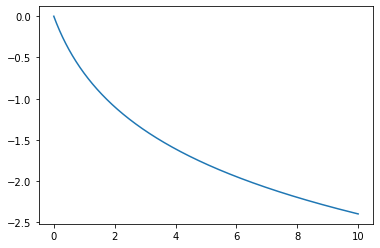

In [29]:
"illustration des performances du programme fourni par l'énoncé, avec x_point = -exp(x) par exemple"
(ts, xs) = solve_ivp_euler_explicit_variable_step(h, 0, 0, 10)
plt.plot([t[0] for t in ts], xs[0])


In [37]:
"pour le programme euler à temps constant"
def convergence_exec(f, x_reel, X0, liste_dt):
    def aux(d) :  
        n = int(10//d)
        t = time.time()
        y = solve_euler_explicit(f, X0, d, n)[1]
        t_ = time.time()
        if type(X0) == np.ndarray : # si l'ordre est supérieur ou égal à 2
            diff = [abs(x_reel(k * d)-y[k][0]) for k in range(len(y))]
        else : 
            diff = [abs(x_reel(k * d)-y[k]) for k in range(len(y))]
            
        return (t_-t, max(diff))
    plt.plot([aux(d)[0] for d in liste_dt], [aux(d)[1] for d in liste_dt])

"pour le programme proposé par l'énoncé"
def new_conv(f, x_reel, X0, liste_dt):
    def aux(d):
        t = time.time()
        y = solve_ivp_euler_explicit_variable_step(f, 0, X0, 10, 1e-16, d)[1][0]
        t_ = time.time()
        if type(X0) == np.ndarray : # si l'ordre est supérieur ou égal à 2
            diff = [abs(x_reel(k * d)-y[k][0]) for k in range(len(y))]
        else : 
            diff = [abs(x_reel(k * d)-y[k]) for k in range(len(y))]
        return (t_-t, max(diff))
    
    plt.plot([aux(d)[0] for d in liste_dt], [aux(d)[1] for d in liste_dt])


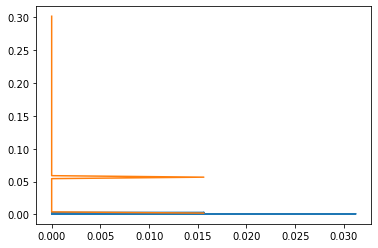

In [40]:
"tracé des deux erreurs en fonction du temps d'éxecution pour comparaison"
new_conv(h, x_reel_1, 0.0, dt_liste)
convergence_exec(h, x_reel_1, 0.0, dt_liste)


on voi qu'en exprimant l'erreur en fonction du temps d'éxecution on a une efficacité bien supérieure pour le programme de l'énoncé. 